# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

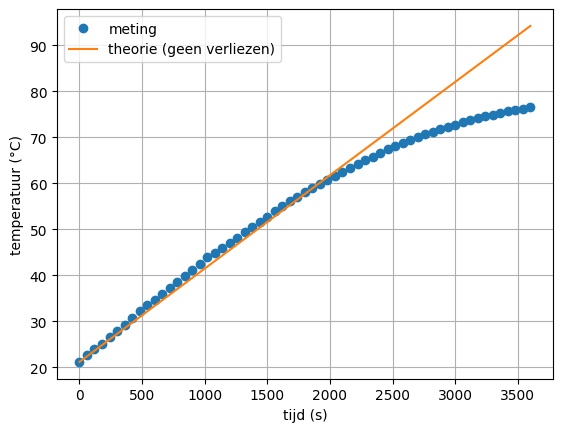

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Data inladen en plotten
# -----------------------------

# data inladen
data = np.loadtxt("tempmetingen.csv", delimiter=";", skiprows=1)

t_min = data[:, 0]        # tijd in minuten
T = data[:, 1]            # temperatuur in °C

# tijd omzetten naar seconden
t = t_min * 60


# bekende grootheden
m_beker = 820.8e-3        # kg
m_start = 1292.9e-3       # kg
m_eind = 1274.9e-3        # kg
m_water_start = m_start - m_beker

c_water = 4180            # J/(kg K)
P = 40                    # W (aanname: constant vermogen)

# theoretische temperatuur zonder verliezen
T_theorie = T[0] + (P / (m_water_start * c_water)) * t

# plot
plt.figure()
plt.plot(t, T, 'o', label='meting')
plt.plot(t, T_theorie, '-', label='theorie (geen verliezen)')
plt.xlabel('tijd (s)')
plt.ylabel('temperatuur (°C)')
plt.grid(True)
plt.legend()
plt.show()

## 2. Energiebalans

De toegevoerde elektrische energie wordt vergeleken met de energie die nodig is voor het opwarmen en de verdamping van het water. Hierbij wordt aangenomen dat het elektrisch vermogen constant is en dat het water goed gemengd is.


In [7]:
# temperatuurverandering
delta_T = T[-1] - T[0]

# opwarmenergie water
Q_opwarming = m_water_start * c_water * delta_T

# verdampte massa
m_verd = m_start - m_eind

# verdampingswarmte water
L_v = 2.26e6  # J/kg

# energie voor verdamping
Q_verdamping = m_verd * L_v

# totale benodigde energie
Q_tot = Q_opwarming + Q_verdamping

# toegevoerde elektrische energie
Q_elek = P * t[-1]

print(f"Opwarmenergie water     = {Q_opwarming:.1f} J")
print(f"Energie voor verdamping = {Q_verdamping:.1f} J")
print(f"Totaal benodigd         = {Q_tot:.1f} J")
print(f"Elektrisch toegevoerd   = {Q_elek:.1f} J")



Opwarmenergie water     = 109325.1 J
Energie voor verdamping = 40680.0 J
Totaal benodigd         = 150005.1 J
Elektrisch toegevoerd   = 144000.0 J


## 3. Discussie en conclusie

De gemeten temperatuur stijgt minder snel dan verwacht op basis van een model zonder energieverliezen. Uit de energiebalans blijkt dat een aanzienlijk deel van de toegevoerde elektrische energie wordt gebruikt voor verdamping van het water.

De grootteorde van de verdampingsenergie is vergelijkbaar met de toegevoerde elektrische energie, wat bevestigt dat verdamping een belangrijke rol speelt in het experiment. Het proces kan daarom niet correct worden beschreven zonder verdamping mee te nemen.

Voor verbetering van het experiment wordt aanbevolen om verdamping te beperken of te controleren met een deksel, het elektrisch vermogen nauwkeurig te meten en warmteverliezen aan de omgeving beter te isoleren.
